# 0.  Mercedes-Benz Greener Manufacturing
    
## 데이터셋 출처
https://www.kaggle.com/c/mercedes-benz-greener-manufacturing
### 목표
* 메르세데스 벤츠 사의 제조 과정에서 테스트 단계에 드는 시간을 예측하세요.

### 설명
* 메르세데스 벤츠 사의 자동차는 다양한 옵션을 선택할 수 있습니다.
* 옵션 선택의 경우의 수에 따라 테스트 단계에서 얼마나 시간을 사용할지가 달라집니다.
* 경우의 수에 따라 테스트 시간을 정확히 예측할 수 있다면 회사가 시간을 단축하는 전략을 세우는 데 도움이 됩니다.
* 기업의 정보 보호를 위해 데이터의 변수들은 익명화되어 있습니다.

## 라이브러리

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

## 데이터 로드

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
train = pd.read_csv("/gdrive/My Drive/Colab Notebooks/data/benz/train.csv.zip", index_col="ID")
test = pd.read_csv("/gdrive/My Drive/Colab Notebooks/data/benz/test.csv.zip", index_col="ID")
submit = pd.read_csv("/gdrive/My Drive/Colab Notebooks/data/benz/sample_submission.csv.zip", index_col="ID")

In [ ]:
train.head()

,y,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
ID,,,,,,,,,,,,,,,,,,,,,
0,130.81,k,v,at,a,d,u,j,o,0,...,0,0,1,0,0,0,0,0,0,0
6,88.53,k,t,av,e,d,y,l,o,0,...,1,0,0,0,0,0,0,0,0,0
7,76.26,az,w,n,c,d,x,j,x,0,...,0,0,0,0,0,0,1,0,0,0
9,80.62,az,t,n,f,d,x,l,e,0,...,0,0,0,0,0,0,0,0,0,0
13,78.02,az,v,n,f,d,h,d,n,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# y가 없음
test.head()

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
ID,,,,,,,,,,,,,,,,,,,,,
1,az,v,n,f,d,t,a,w,0,0,...,0,0,0,1,0,0,0,0,0,0
2,t,b,ai,a,d,b,g,y,0,0,...,0,0,1,0,0,0,0,0,0,0
3,az,v,as,f,d,a,j,j,0,0,...,0,0,0,1,0,0,0,0,0,0
4,az,l,n,f,d,z,l,n,0,0,...,0,0,0,1,0,0,0,0,0,0
5,w,s,as,c,d,y,i,m,0,0,...,1,0,0,0,0,0,0,0,0,0


# 1. EDA

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4209 entries, 0 to 8417
Columns: 377 entries, y to X385
dtypes: float64(1), int64(368), object(8)
memory usage: 12.1+ MB


In [ ]:
train.describe()

,y,X10,X11,X12,X13,X14,X15,X16,X17,X18,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
count,4209.000000,4209.000000,4209.0,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,...,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000
mean,100.669318,0.013305,0.0,0.075077,0.057971,0.428130,0.000475,0.002613,0.007603,0.007840,...,0.318841,0.057258,0.314802,0.020670,0.009503,0.008078,0.007603,0.001663,0.000475,0.001426
std,12.679381,0.114590,0.0,0.263547,0.233716,0.494867,0.021796,0.051061,0.086872,0.088208,...,0.466082,0.232363,0.464492,0.142294,0.097033,0.089524,0.086872,0.040752,0.021796,0.037734
min,72.110000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.820000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,99.150000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,109.010000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,265.320000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
train_nunique = train.nunique().sort_values()
train_nunique

X290       1
X235       1
X11        1
X297       1
X347       1
        ... 
X1        27
X5        29
X2        44
X0        47
y       2545
Length: 377, dtype: int64

In [ ]:
train_one_idx = train_nunique[train_nunique == 1].index
train_one_idx

Index(['X290', 'X235', 'X11', 'X297', 'X347', 'X268', 'X107', 'X293', 'X330',
       'X289', 'X93', 'X233'],
      dtype='object')

In [ ]:
train = train.drop(columns=train_one_idx)
test = test.drop(columns=train_one_idx)

## 이상치 제거

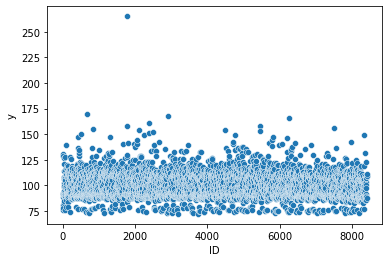

In [ ]:
sns.scatterplot(data=train, x=train.index, y="y")

In [ ]:
train[train["y"] > 200]

,y,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
ID,,,,,,,,,,,,,,,,,,,,,
1770,265.32,y,r,ai,f,d,ag,l,t,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
train = train[train["y"] < 200].copy()
train.shape

(4208, 365)

#2. Feature Engineering
- One-Hot-Encoding

In [ ]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(handle_unknown="ignore")
train_ohe = ohe.fit_transform(train.drop(columns="y"))
test_ohe = ohe.transform(test)

train_ohe.shape, test_ohe.shape

((4208, 907), (4209, 907))

#3. 데이터 나누기

In [ ]:
X = train_ohe
y = train["y"]
X.shape, y.shape

((4208, 907), (4208,))

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.1, random_state=42)

X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((3787, 907), (421, 907), (3787,), (421,))

In [ ]:
X_test = test_ohe
X_test.shape

(4209, 907)

# 4. LinearRegression

In [ ]:
from sklearn.linear_model import LinearRegression

model_linear = LinearRegression(n_jobs=-1)
model_linear

LinearRegression(n_jobs=-1)

In [ ]:
model_linear.fit(X_train, y_train)

LinearRegression(n_jobs=-1)

In [ ]:
y_predict = model_linear.predict(X_valid)

In [ ]:
from sklearn.metrics import r2_score

score = r2_score(y_valid, y_predict)
score

0.49472857438585705

In [ ]:
y_test = model_linear.predict(X_test)

In [ ]:
submit["y"] = y_test

In [ ]:
file_name = f"linear_{score:.5f}.csv"

In [ ]:
submit.to_csv(file_name, index=True)

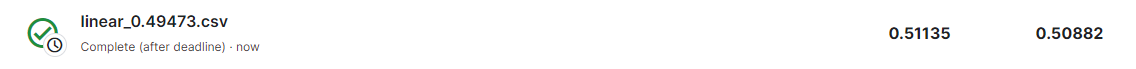

# 5. Gradient Boosting Tree

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
model_gbt = GradientBoostingRegressor(random_state=42)
model_gbt

GradientBoostingRegressor(random_state=42)

In [ ]:
model_gbt.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [ ]:
y_predict = model_gbt.predict(X_valid)

In [ ]:
score = r2_score(y_valid, y_predict)
score

0.5316456718499794

In [ ]:
y_test = model_gbt.predict(X_test)

In [ ]:
submit["y"] = y_test

In [ ]:
file_name = f"gbt_{score:.5f}.csv"

In [ ]:
submit.to_csv(file_name, index=True)

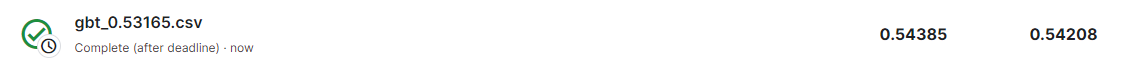

#6. XGBoost

In [ ]:
import xgboost as xgb
from xgboost import XGBRegressor

xgb_model = XGBRegressor(n_jobs=-1, random_state=42)

xgb_model

XGBRegressor(n_jobs=-1, random_state=42)

In [ ]:
xgb_model.fit(X_train, y_train)

[10:04:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(n_jobs=-1, random_state=42)

In [ ]:
y_predict = xgb_model.predict(X_valid)

In [ ]:
score = r2_score(y_valid, y_predict)
score

0.5434396045551741

In [ ]:
y_test = xgb_model.predict(X_test)

In [ ]:
submit["y"] = y_test

In [ ]:
file_name = f"xgb_{score:.5f}.csv"

In [ ]:
submit.to_csv(file_name, index=True)

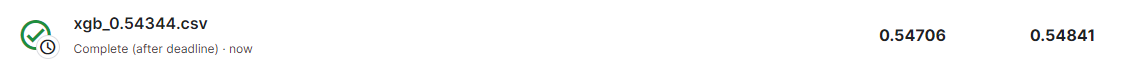

# 7. lgbm

In [ ]:
import lightgbm as lgbm
from lightgbm import LGBMRegressor

model_lgbm = LGBMRegressor(n_jobs=-1, random_state=42)
model_lgbm

LGBMRegressor(random_state=42)

In [ ]:
model_lgbm.fit(X_train, y_train)

LGBMRegressor(random_state=42)

In [ ]:
y_predict = model_lgbm.predict(X_valid)

In [ ]:
from sklearn.metrics import r2_score

score = r2_score(y_valid, y_predict)
score

0.5099306105986585

In [ ]:
y_test = model_gbt.predict(X_test)

In [ ]:
submit["y"] = y_test

In [ ]:
file_name = f"lgbm_{score:.5f}.csv"

In [ ]:
submit.to_csv(file_name, index=True)

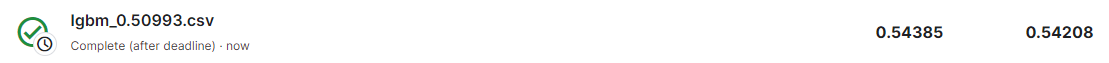

#8. catboost

In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 10.1 MB/s eta 0:00:00


In [ ]:
import catboost as cat
from catboost import CatBoostRegressor

model_cat = CatBoostRegressor(eval_metric="R2", verbose=False)
model_cat

In [ ]:
model_cat.fit(X_train, y_train)

In [ ]:
y_predict = model_cat.predict(X_valid)

In [ ]:
from sklearn.metrics import r2_score

score = r2_score(y_valid, y_predict)
score

0.5274388846659475

In [ ]:
y_test = model_cat.predict(X_test)

In [ ]:
submit["y"] = y_test

In [ ]:
file_name = f"cat_{score:.5f}.csv"

In [ ]:
submit.to_csv(file_name, index=True)

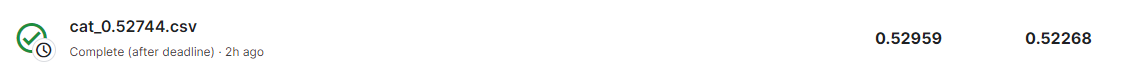